In [2]:
import pandas as pd
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import mlflow
import mlflow.keras

#hola juanfer, primero vamos a cargar el dataset
df = pd.read_csv("BarcelonaAbnb_limpio.csv")


df.head()
df.info()
df.describe()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13415 entries, 0 to 13414
Data columns (total 48 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   host_response_time                                13415 non-null  float64
 1   host_response_rate                                13415 non-null  float64
 2   host_acceptance_rate                              13415 non-null  float64
 3   host_is_superhost                                 13415 non-null  float64
 4   host_has_profile_pic                              13415 non-null  float64
 5   host_identity_verified                            13415 non-null  float64
 6   latitude                                          13415 non-null  float64
 7   longitude                                         13415 non-null  float64
 8   accommodates                                      13415 non-null  float64
 9   bathrooms        

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,room_type_Shared room,neighbourhood_group_cleansed_Eixample,neighbourhood_group_cleansed_Gràcia,neighbourhood_group_cleansed_Horta-Guinardó,neighbourhood_group_cleansed_Les Corts,neighbourhood_group_cleansed_Nou Barris,neighbourhood_group_cleansed_Sant Andreu,neighbourhood_group_cleansed_Sant Martí,neighbourhood_group_cleansed_Sants-Montjuïc,neighbourhood_group_cleansed_Sarrià-Sant Gervasi
count,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,...,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000
mean,0.409318,93.302274,85.256504,0.241073,0.962579,0.954379,41.392294,2.166916,3.441893,1.418785,...,0.005367,0.351174,0.089676,0.027581,0.021543,0.010734,0.015878,0.094223,0.100485,0.061573
std,0.750400,15.995362,25.449316,0.427751,0.189798,0.208669,0.013932,0.017872,1.940913,0.639469,...,0.073067,0.477355,0.285727,0.163775,0.145191,0.103053,0.125007,0.292149,0.300656,0.240387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.351783,2.091740,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,96.000000,82.000000,0.000000,1.000000,1.000000,41.381220,2.156200,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,100.000000,98.000000,0.000000,1.000000,1.000000,41.390380,2.167810,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,100.000000,100.000000,0.000000,1.000000,1.000000,41.401620,2.177755,4.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,100.000000,100.000000,1.000000,1.000000,1.000000,41.462243,2.221390,16.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


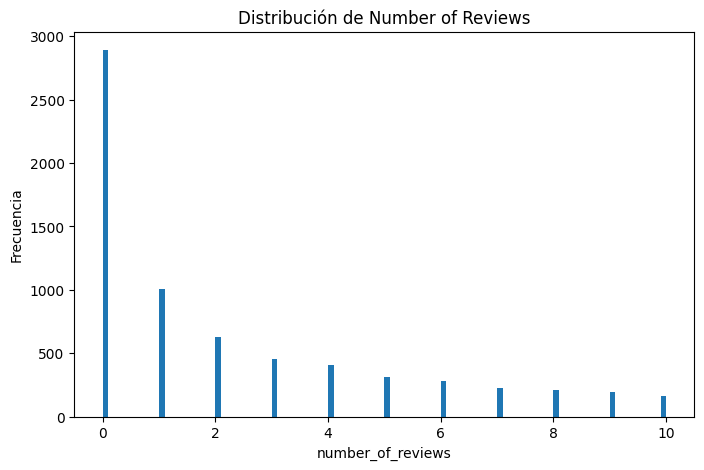

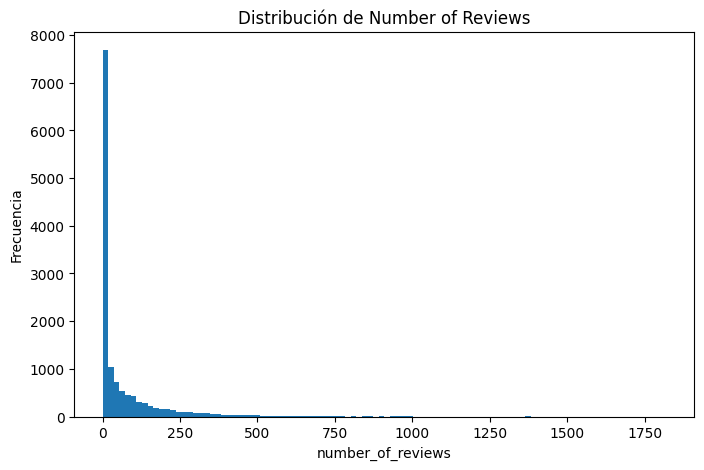

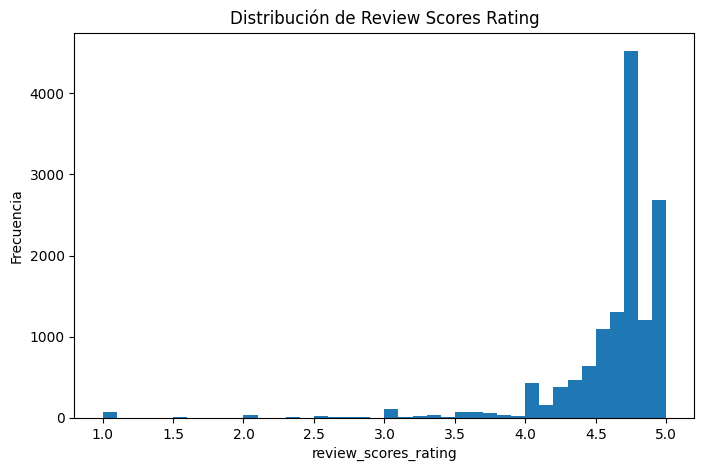

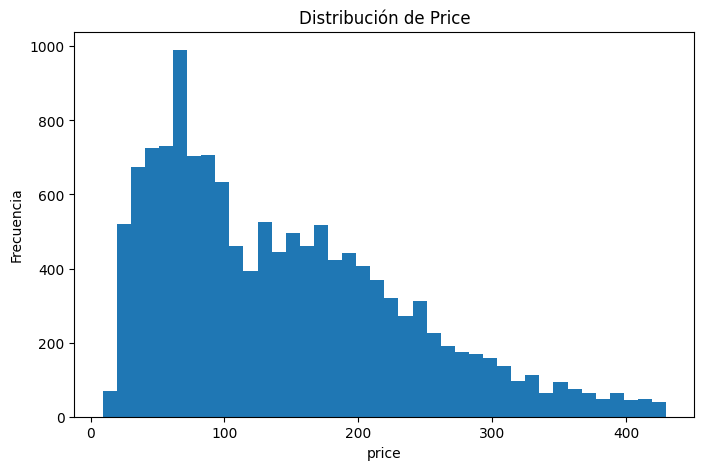

In [5]:
import pandas as pd
import matplotlib.pyplot as plt



#plt.style.use('ggplot')

df2 = df[df["number_of_reviews"]<= 10]
df2.head()

# --------- FIGURA 1---------
plt.figure(figsize=(8,5))
plt.hist(df2["number_of_reviews"].dropna(), bins=100)
plt.title("Distribución de Number of Reviews")
plt.xlabel("number_of_reviews")
plt.ylabel("Frecuencia")
plt.show()
plt.figure(figsize=(8,5))
plt.hist(df["number_of_reviews"].dropna(), bins=100)
plt.title("Distribución de Number of Reviews")
plt.xlabel("number_of_reviews")
plt.ylabel("Frecuencia")
plt.show()

# --------- FIGURA 2---------
plt.figure(figsize=(8,5))
plt.hist(df["review_scores_rating"].dropna(), bins=40)
plt.title("Distribución de Review Scores Rating")
plt.xlabel("review_scores_rating")
plt.ylabel("Frecuencia")
plt.show()

# --------- FIGURA 3---------
plt.figure(figsize=(8,5))
plt.hist(df["price"].dropna(), bins=40)
plt.title("Distribución de Price")
plt.xlabel("price")
plt.ylabel("Frecuencia")
plt.show()


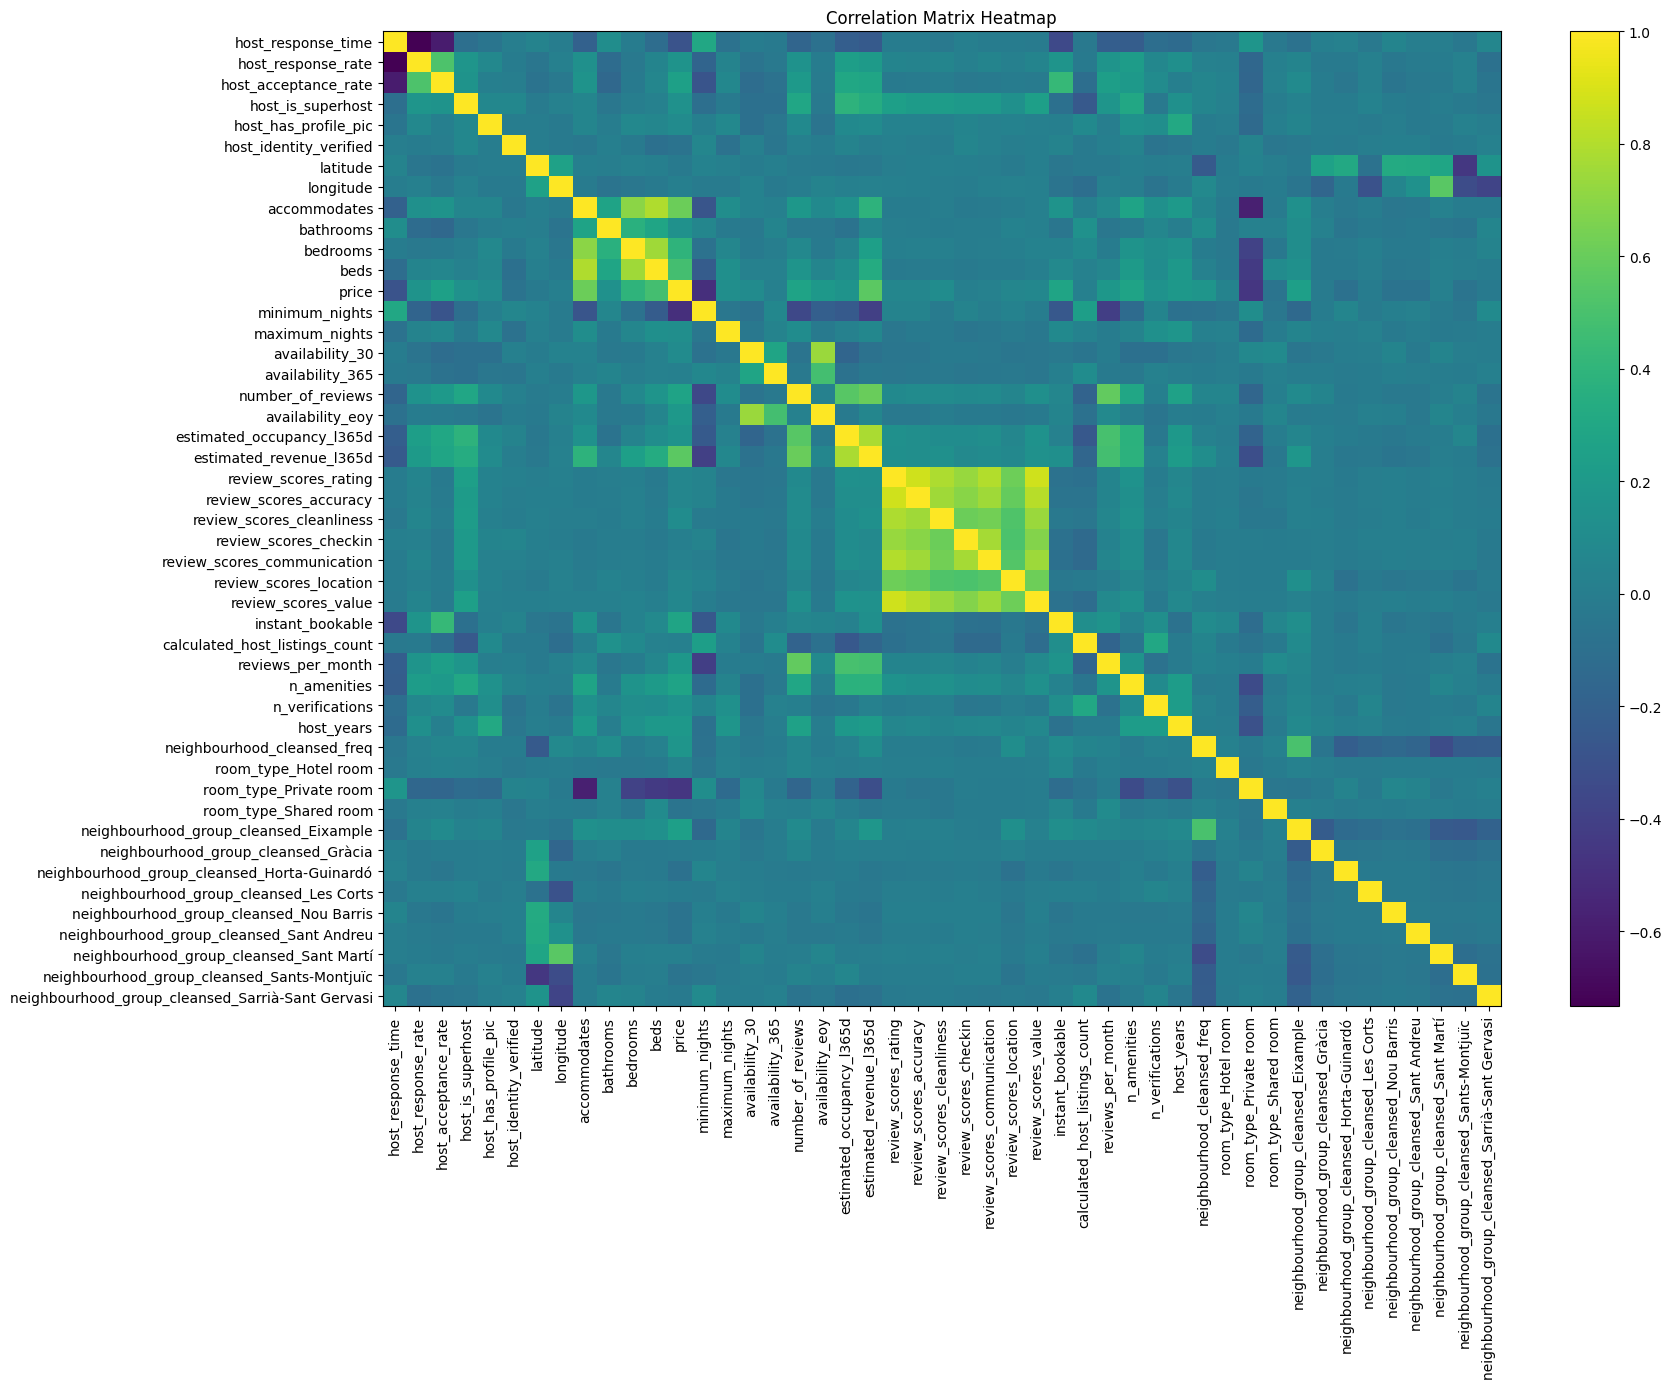

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Seleccionar solo columnas numéricas
num_df = df.select_dtypes(include=[np.number])

# Matriz de correlación
corr_matrix = num_df.corr()

corr_filtrada = corr_matrix.where(corr_matrix.abs() > 0.5)
corr_pairs = (
    corr_matrix
    .abs()
    .stack()
    .reset_index()
    .rename(columns={'level_0':'var1', 'level_1':'var2', 0:'corr'})
)

corr_pairs = corr_pairs[
    (corr_pairs['corr'] > 0.5) & 
    (corr_pairs['var1'] != corr_pairs['var2'])
].sort_values(by="corr", ascending=False)
corr_pairs = corr_pairs.drop_duplicates(subset=['corr'])
corr_pairs.to_excel("correlation_pairs.xlsx", index=False)
# Graficar heatmap de correlación
plt.figure(figsize=(18, 14))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.title("Correlation Matrix Heatmap")

# Etiquetas en los ejes
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.tight_layout()
plt.show()






In [7]:

# Crear tabla de frecuencias
freq_table = (
    df2["number_of_reviews"]
    .value_counts()      
    .sort_index()        
    .reset_index()       
)

freq_table.columns = ["number_of_reviews", "frequency"]

# Mostrar tabla
print(freq_table.sum(), len(df))


number_of_reviews      55
frequency            6771
dtype: int64 13415


In [8]:
# ----------------------------
# 2. Crear variable "recommended"
# ----------------------------

# Criterio:x
# recommended = 1 si:
# - review_scores_rating >= 4.5
# - number_of_reviews >= 10
# - price <= Q75


q75_price = df["price"].quantile(0.75)

df["recommended"] = np.where(
    (df["review_scores_rating"] >= 4.5) &
    (df["number_of_reviews"] >= 10) &
    (df["price"] <= q75_price),
    1,
    0)


df["recommended"].value_counts(normalize=True)


recommended
0    0.753336
1    0.246664
Name: proportion, dtype: float64

In [7]:
# ----------------------------
# 3. Selección de features
# ----------------------------
# One-hot encoding de la variable property_type_clean
df_encoded = pd.get_dummies(df, columns=["property_type_clean"], drop_first=True)
df_encoded["property_type_clean_Entire rental unit"] = df_encoded["property_type_clean_Entire rental unit"].astype(int)
df_encoded["property_type_clean_Entire serviced apartment"] = df_encoded["property_type_clean_Entire serviced apartment"].astype(int)
df_encoded["property_type_clean_Other"] = df_encoded["property_type_clean_Other"].astype(int)
df_encoded["property_type_clean_Private room in rental unit"] = df_encoded["property_type_clean_Private room in rental unit"].astype(int)
df_encoded["property_type_clean_Room in hotel"] = df_encoded["property_type_clean_Room in hotel"].astype(int)


df_encoded.head()


y_clf = df_encoded["recommended"].values


cols_leakage = [
    "recommended",
    "price",

    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",

    "number_of_reviews",
    "reviews_per_month",

    "estimated_occupancy_l365d",
    "estimated_revenue_l365d",

    "availability_30",
    "availability_365",
    "availability_eoy"
]

X = df_encoded.drop(columns=cols_leakage)

X = X.select_dtypes(include=["number"])


print(X.shape)
X.head()


(13415, 37)


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,neighbourhood_group_cleansed_Nou Barris,neighbourhood_group_cleansed_Sant Andreu,neighbourhood_group_cleansed_Sant Martí,neighbourhood_group_cleansed_Sants-Montjuïc,neighbourhood_group_cleansed_Sarrià-Sant Gervasi,property_type_clean_Entire rental unit,property_type_clean_Entire serviced apartment,property_type_clean_Other,property_type_clean_Private room in rental unit,property_type_clean_Room in hotel
0,0.0,96.0,91.0,0.0,1.0,1.0,41.405560,2.17262,8.0,2.0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,100.0,96.0,1.0,1.0,1.0,41.412432,2.21975,5.0,2.0,...,0,0,1,0,0,1,0,0,0,0
2,0.0,100.0,100.0,0.0,1.0,1.0,41.405660,2.17015,6.0,2.0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,100.0,92.0,0.0,1.0,1.0,41.380620,2.17517,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,100.0,92.0,0.0,1.0,1.0,41.379780,2.17623,9.0,3.0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
# ----------------------------
# 4. Train / Test split
# ----------------------------

from sklearn.model_selection import train_test_split

X_train, X_test, y_clf_train, y_clf_test = train_test_split(
    X, y_clf,
    test_size=0.2,
    random_state=42
)


# ----------------------------
# 5. Escalamiento (StandardScaler)
# ----------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((10732, 37), (2683, 37))

In [9]:
# ----------------------------
# 9. Modelo de Clasificación - Red Neuronal
# ----------------------------

def build_classification_model(n_features,
                               n_hidden1=64,
                               n_hidden2=32,
                               n_hidden3=16,
                               learning_rate=1e-3,
                               dropout_rate=0.2):
    model = keras.Sequential([
        layers.Input(shape=(n_features,)),
        layers.Dense(n_hidden1, activation="relu"),
        layers.Dropout(dropout_rate),
        layers.Dense(n_hidden2, activation="relu"),
        layers.Dropout(dropout_rate),
        layers.Dense(n_hidden3, activation="relu"),
        layers.Dense(1, activation="sigmoid")  
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

n_features = X_train_scaled.shape[1]
print(n_features)
model_clf = build_classification_model(n_features)
model_clf.summary()


37


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# ----------------------------
# 10. Entrenamiento Clasificación
# ----------------------------

history_clf = model_clf.fit(
    X_train_scaled, y_clf_train,
    validation_data=(X_test_scaled, y_clf_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# ----------------------------
# 11. Evaluación en test
# ----------------------------

y_clf_proba = model_clf.predict(X_test_scaled).flatten()
y_clf_pred = (y_clf_proba >= 0.5).astype(int)

acc = accuracy_score(y_clf_test, y_clf_pred)
f1 = f1_score(y_clf_test, y_clf_pred)
prec = precision_score(y_clf_test, y_clf_pred)
rec = recall_score(y_clf_test, y_clf_pred)
roc = roc_auc_score(y_clf_test, y_clf_proba)

print(f"Accuracy (test): {acc:.3f}")
print(f"F1       (test): {f1:.3f}")
print(f"Precision(test): {prec:.3f}")
print(f"Recall   (test): {rec:.3f}")
print(f"ROC-AUC  (test): {roc:.3f}")


Epoch 1/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8572 - loss: 0.3211 - val_accuracy: 0.8021 - val_loss: 0.4289
Epoch 2/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8566 - loss: 0.3175 - val_accuracy: 0.7976 - val_loss: 0.4351
Epoch 3/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8524 - loss: 0.3191 - val_accuracy: 0.7999 - val_loss: 0.4284
Epoch 4/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8545 - loss: 0.3173 - val_accuracy: 0.8051 - val_loss: 0.4296
Epoch 5/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8545 - loss: 0.3124 - val_accuracy: 0.8006 - val_loss: 0.4294
Epoch 6/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8557 - loss: 0.3151 - val_accuracy: 0.7961 - val_loss: 0.4323
Epoch 7/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8559 - loss: 0.3186 - val_accuracy: 0.7920 - val_loss: 0.4352
Epoch 8/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8541 - loss: 0.3165 - val_accu

In [12]:
import requests

try:
    r = requests.get("http://localhost:5000")
    print("Código HTTP:", r.status_code)
    print(r.text[:500])
except Exception as e:
    print("Error:", e)


Código HTTP: 200
<!doctype html><html lang="en"><head><meta charset="utf-8"/><meta name="viewport" content="width=device-width,initial-scale=1,shrink-to-fit=no"/><link rel="shortcut icon" href="./static-files/favicon.ico"/><meta name="theme-color" content="#000000"/><link rel="manifest" href="./static-files/manifest.json" crossorigin="use-credentials"/><title>MLflow</title><script defer="defer" src="static-files/static/js/main.380f9aea.js"></script><link href="static-files/static/css/main.280d6c90.css" rel="styl


In [26]:
# ----------------------------
# 12. MLflow - Configuración
# ----------------------------

import mlflow
import mlflow.keras

# Si tu servidor corre local:
mlflow.set_tracking_uri("http://localhost:5000")
# Crear/seleccionar experimento
experiment = mlflow.set_experiment("airbnb-barcelona-clf-nn")
print("Experiment ID:", experiment.experiment_id)




Experiment ID: 463698806836289709


In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def run_mlflow_experiment(
    n_hidden1=64,
    n_hidden2=32,
    n_hidden3=16,
    learning_rate=1e-3,
    dropout_rate=0.2,
    epochs=50,
    batch_size=32,
    run_name="clf_nn_base"
):
    with mlflow.start_run(run_name=run_name, experiment_id=experiment.experiment_id):

        # 1. Log de hiperparámetros
        mlflow.log_param("n_hidden1", n_hidden1)
        mlflow.log_param("n_hidden2", n_hidden2)
        mlflow.log_param("n_hidden3", n_hidden3)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("dropout_rate", dropout_rate)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("batch_size", batch_size)

        # 2. Construir modelo
        model = build_classification_model(
            n_features=n_features,
            n_hidden1=n_hidden1,
            n_hidden2=n_hidden2,
            n_hidden3=n_hidden3,
            learning_rate=learning_rate,
            dropout_rate=dropout_rate
        )

        # 3. Entrenar
        history = model.fit(
            X_train_scaled, y_clf_train,
            validation_data=(X_test_scaled, y_clf_test),
            epochs=epochs,
            batch_size=batch_size,
            verbose=0
        )

        # 4. Predicciones
        y_proba = model.predict(X_test_scaled).flatten()
        y_pred = (y_proba >= 0.5).astype(int)

        # 5. Métricas
        acc = accuracy_score(y_clf_test, y_pred)
        f1 = f1_score(y_clf_test, y_pred)
        prec = precision_score(y_clf_test, y_pred)
        rec = recall_score(y_clf_test, y_pred)
        auc = roc_auc_score(y_clf_test, y_proba)

        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1", f1)
        mlflow.log_metric("precision", prec)
        mlflow.log_metric("recall", rec)
        mlflow.log_metric("roc_auc", auc)

        # 6. Guardar modelo
        mlflow.keras.log_model(model, "model")

        print(f"Run '{run_name}' -> acc={acc:.3f}, f1={f1:.3f}, auc={auc:.3f}")


In [30]:
# Lista de configuraciones de hiperparámetros
configs = [
    {
        "run_name": "cfg_1_base",
        "n_hidden1": 64,
        "n_hidden2": 32,
        "n_hidden3": 16,
        "learning_rate": 1e-3,
        "dropout_rate": 0.2,
        "epochs": 50,
        "batch_size": 32,
    },
    {
        "run_name": "cfg_2_mas_capas",
        "n_hidden1": 128,
        "n_hidden2": 64,
        "n_hidden3": 32,
        "learning_rate": 1e-3,
        "dropout_rate": 0.3,
        "epochs": 60,
        "batch_size": 32,
    },
    {
        "run_name": "cfg_3_menos_neuronas",
        "n_hidden1": 32,
        "n_hidden2": 16,
        "n_hidden3": 8,
        "learning_rate": 1e-3,
        "dropout_rate": 0.2,
        "epochs": 40,
        "batch_size": 64,
    },
    {
        "run_name": "cfg_4_lr_mas_bajo",
        "n_hidden1": 64,
        "n_hidden2": 32,
        "n_hidden3": 16,
        "learning_rate": 5e-4,
        "dropout_rate": 0.2,
        "epochs": 60,
        "batch_size": 32,
    },
    {
        "run_name": "cfg_5_dropout_bajo",
        "n_hidden1": 64,
        "n_hidden2": 32,
        "n_hidden3": 16,
        "learning_rate": 1e-3,
        "dropout_rate": 0.1,
        "epochs": 50,
        "batch_size": 32,
    },
]

# Ejecutar todas las configuraciones
for cfg in configs:
    print(f"=== Corriendo {cfg['run_name']} ===")
    run_mlflow_experiment(**cfg)
    print()



=== Corriendo cfg_1_base ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


2025/11/26 22:31:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:31:57 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:32:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'cfg_1_base' -> acc=0.800, f1=0.579, auc=0.842
🏃 View run cfg_1_base at: http://localhost:5000/#/experiments/463698806836289709/runs/7b5ff2ec989a4aeeb869d220940fef7e
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo cfg_2_mas_capas ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 22:32:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:32:49 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:32:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'cfg_2_mas_capas' -> acc=0.792, f1=0.582, auc=0.845
🏃 View run cfg_2_mas_capas at: http://localhost:5000/#/experiments/463698806836289709/runs/4824de029373486fb2e5395ee4864c9c
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo cfg_3_menos_neuronas ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 22:33:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:33:16 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:33:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'cfg_3_menos_neuronas' -> acc=0.797, f1=0.555, auc=0.835
🏃 View run cfg_3_menos_neuronas at: http://localhost:5000/#/experiments/463698806836289709/runs/11a25bd53bd74d68b028b7a247f409eb
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo cfg_4_lr_mas_bajo ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 22:34:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:34:06 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:34:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'cfg_4_lr_mas_bajo' -> acc=0.804, f1=0.561, auc=0.843
🏃 View run cfg_4_lr_mas_bajo at: http://localhost:5000/#/experiments/463698806836289709/runs/379afc396a154861a2579de5019b485d
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo cfg_5_dropout_bajo ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 22:34:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:34:55 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:35:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'cfg_5_dropout_bajo' -> acc=0.802, f1=0.583, auc=0.836
🏃 View run cfg_5_dropout_bajo at: http://localhost:5000/#/experiments/463698806836289709/runs/14b35c7e5fc044f4837b14dacfebdf72
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709



In [31]:
#RUNS GENERADAS POR CHATGPT PIDIÉNDOLE QUE SUGIERA MÁS CONFIGURACIONES PARA HIPERPARÁMETROS.

configs2 = [
    # ---- MODELOS PEQUEÑOS ----
    {"run_name": "small_1", "n_hidden1": 16, "n_hidden2": 8,  "n_hidden3": 4,  "learning_rate": 1e-3, "dropout_rate": 0.1, "epochs": 40, "batch_size": 32},
    {"run_name": "small_2", "n_hidden1": 32, "n_hidden2": 16, "n_hidden3": 8,  "learning_rate": 5e-4, "dropout_rate": 0.1, "epochs": 50, "batch_size": 32},
    {"run_name": "small_3", "n_hidden1": 32, "n_hidden2": 16, "n_hidden3": 8,  "learning_rate": 1e-3, "dropout_rate": 0.2, "epochs": 30, "batch_size": 64},
    {"run_name": "small_4", "n_hidden1": 16, "n_hidden2": 8,  "n_hidden3": 4,  "learning_rate": 1e-4, "dropout_rate": 0.3, "epochs": 50, "batch_size": 64},
    {"run_name": "small_5", "n_hidden1": 16, "n_hidden2": 8,  "n_hidden3": 4,  "learning_rate": 1e-3, "dropout_rate": 0.0, "epochs": 40, "batch_size": 32},

    # ---- MODELOS MEDIOS ----
    {"run_name": "medium_1", "n_hidden1": 64, "n_hidden2": 32, "n_hidden3": 16, "learning_rate": 1e-3, "dropout_rate": 0.2, "epochs": 50, "batch_size": 32},
    {"run_name": "medium_2", "n_hidden1": 64, "n_hidden2": 32, "n_hidden3": 16, "learning_rate": 5e-4, "dropout_rate": 0.3, "epochs": 60, "batch_size": 32},
    {"run_name": "medium_3", "n_hidden1": 128, "n_hidden2": 64, "n_hidden3": 32, "learning_rate": 1e-3, "dropout_rate": 0.2, "epochs": 70, "batch_size": 32},
    {"run_name": "medium_4", "n_hidden1": 64, "n_hidden2": 32, "n_hidden3": 16, "learning_rate": 3e-4, "dropout_rate": 0.1, "epochs": 60, "batch_size": 64},
    {"run_name": "medium_5", "n_hidden1": 128, "n_hidden2": 64, "n_hidden3": 32, "learning_rate": 1e-4, "dropout_rate": 0.2, "epochs": 80, "batch_size": 32},

    # ---- MODELOS GRANDES ----
    {"run_name": "large_1", "n_hidden1": 256, "n_hidden2": 128, "n_hidden3": 64, "learning_rate": 1e-3, "dropout_rate": 0.3, "epochs": 80, "batch_size": 32},
    {"run_name": "large_2", "n_hidden1": 256, "n_hidden2": 128, "n_hidden3": 64, "learning_rate": 5e-4, "dropout_rate": 0.4, "epochs": 90, "batch_size": 32},
    {"run_name": "large_3", "n_hidden1": 512, "n_hidden2": 256, "n_hidden3": 128, "learning_rate": 1e-3, "dropout_rate": 0.2, "epochs": 100, "batch_size": 64},
    {"run_name": "large_4", "n_hidden1": 256, "n_hidden2": 128, "n_hidden3": 64, "learning_rate": 2e-4, "dropout_rate": 0.3, "epochs": 100, "batch_size": 32},
    {"run_name": "large_5", "n_hidden1": 512, "n_hidden2": 256, "n_hidden3": 128, "learning_rate": 1e-4, "dropout_rate": 0.4, "epochs": 120, "batch_size": 32},

    # ---- LEARNING RATES VARIADOS ----
    {"run_name": "lr_1e_minus_2",  "n_hidden1": 64, "n_hidden2": 32, "n_hidden3": 16, "learning_rate": 1e-2, "dropout_rate": 0.2, "epochs": 40, "batch_size": 32},
    {"run_name": "lr_5e_minus_3",  "n_hidden1": 64, "n_hidden2": 32, "n_hidden3": 16, "learning_rate": 5e-3, "dropout_rate": 0.2, "epochs": 40, "batch_size": 32},
    {"run_name": "lr_5e_minus_4",  "n_hidden1": 128, "n_hidden2": 64, "n_hidden3": 32, "learning_rate": 5e-4, "dropout_rate": 0.3, "epochs": 60, "batch_size": 32},
    {"run_name": "lr_1e_minus_4",  "n_hidden1": 128, "n_hidden2": 64, "n_hidden3": 32, "learning_rate": 1e-4, "dropout_rate": 0.2, "epochs": 80, "batch_size": 32},
    {"run_name": "lr_3e_minus_4",  "n_hidden1": 256, "n_hidden2": 128, "n_hidden3": 64, "learning_rate": 3e-4, "dropout_rate": 0.2, "epochs": 80, "batch_size": 32},
]
for cfg in configs2:
    print(f"=== Corriendo {cfg['run_name']} ===")
    run_mlflow_experiment(**cfg)
    print()


=== Corriendo small_1 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


2025/11/26 22:36:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:36:31 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:36:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'small_1' -> acc=0.789, f1=0.540, auc=0.831
🏃 View run small_1 at: http://localhost:5000/#/experiments/463698806836289709/runs/5c23f7bf9deb49e9abc75e64485c9866
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo small_2 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 22:37:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:37:12 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:37:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'small_2' -> acc=0.793, f1=0.545, auc=0.837
🏃 View run small_2 at: http://localhost:5000/#/experiments/463698806836289709/runs/a8eacaa1dee549308493f35ea5183144
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo small_3 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


2025/11/26 22:37:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:37:35 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:37:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'small_3' -> acc=0.795, f1=0.527, auc=0.831
🏃 View run small_3 at: http://localhost:5000/#/experiments/463698806836289709/runs/38ae7e4b31d44ba6b91852f246442e10
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo small_4 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step


2025/11/26 22:38:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:38:04 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:38:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'small_4' -> acc=0.750, f1=0.154, auc=0.806
🏃 View run small_4 at: http://localhost:5000/#/experiments/463698806836289709/runs/46e200e07d714db994820114fd1b359e
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo small_5 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 22:38:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:38:38 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:38:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'small_5' -> acc=0.796, f1=0.553, auc=0.829
🏃 View run small_5 at: http://localhost:5000/#/experiments/463698806836289709/runs/b1d45458d1744dcd86498fb6f999ef7b
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo medium_1 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 22:39:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:39:20 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:39:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'medium_1' -> acc=0.798, f1=0.544, auc=0.846
🏃 View run medium_1 at: http://localhost:5000/#/experiments/463698806836289709/runs/6b560d3f97dc4f33b5fd5180edbe9113
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo medium_2 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step


2025/11/26 22:40:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:40:10 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:40:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'medium_2' -> acc=0.801, f1=0.570, auc=0.842
🏃 View run medium_2 at: http://localhost:5000/#/experiments/463698806836289709/runs/71761d446302465eb352fec92e6f1677
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo medium_3 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 22:40:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:40:59 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:41:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'medium_3' -> acc=0.797, f1=0.562, auc=0.840
🏃 View run medium_3 at: http://localhost:5000/#/experiments/463698806836289709/runs/73031b72302a4c42bc3c8288566a2d8b
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo medium_4 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025/11/26 22:41:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:41:35 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:41:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'medium_4' -> acc=0.800, f1=0.572, auc=0.839
🏃 View run medium_4 at: http://localhost:5000/#/experiments/463698806836289709/runs/016d91fdc3db4262873dcb202a281916
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo medium_5 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step


2025/11/26 22:42:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:42:31 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:42:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'medium_5' -> acc=0.798, f1=0.540, auc=0.842
🏃 View run medium_5 at: http://localhost:5000/#/experiments/463698806836289709/runs/4915ed7f7104432c906a1b59d720038a
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo large_1 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 22:43:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:43:33 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:43:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'large_1' -> acc=0.795, f1=0.583, auc=0.838
🏃 View run large_1 at: http://localhost:5000/#/experiments/463698806836289709/runs/62963940f03b406b89299d3a6e5f7371
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo large_2 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 22:44:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:44:38 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:44:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'large_2' -> acc=0.805, f1=0.610, auc=0.844
🏃 View run large_2 at: http://localhost:5000/#/experiments/463698806836289709/runs/9ef2b39c4ef64b41b116e8b5bcc96979
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo large_3 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 22:45:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:45:48 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:45:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'large_3' -> acc=0.800, f1=0.593, auc=0.832
🏃 View run large_3 at: http://localhost:5000/#/experiments/463698806836289709/runs/97370ce630874cc68d19eabc117396fb
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo large_4 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


2025/11/26 22:56:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:56:42 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:56:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'large_4' -> acc=0.801, f1=0.570, auc=0.843
🏃 View run large_4 at: http://localhost:5000/#/experiments/463698806836289709/runs/ee4afd451bee4eadabc43e5259e270fe
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo large_5 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025/11/26 22:59:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 22:59:18 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 22:59:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'large_5' -> acc=0.800, f1=0.560, auc=0.843
🏃 View run large_5 at: http://localhost:5000/#/experiments/463698806836289709/runs/3cebbfec5b3d48dda9e75c8c17e318d4
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo lr_1e_minus_2 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 23:00:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 23:00:03 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 23:00:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'lr_1e_minus_2' -> acc=0.799, f1=0.579, auc=0.838
🏃 View run lr_1e_minus_2 at: http://localhost:5000/#/experiments/463698806836289709/runs/dc6123ddb72e43ffa4ebe65e82fa5043
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo lr_5e_minus_3 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 23:00:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 23:00:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 23:00:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'lr_5e_minus_3' -> acc=0.800, f1=0.575, auc=0.846
🏃 View run lr_5e_minus_3 at: http://localhost:5000/#/experiments/463698806836289709/runs/ad8ce3774a6d434080a4166e738bcf7b
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo lr_5e_minus_4 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 23:01:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 23:01:30 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 23:01:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'lr_5e_minus_4' -> acc=0.800, f1=0.562, auc=0.839
🏃 View run lr_5e_minus_4 at: http://localhost:5000/#/experiments/463698806836289709/runs/dd190005ad3b4085b0741c1bc80b441b
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo lr_1e_minus_4 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025/11/26 23:02:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 23:02:31 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 23:02:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'lr_1e_minus_4' -> acc=0.799, f1=0.572, auc=0.839
🏃 View run lr_1e_minus_4 at: http://localhost:5000/#/experiments/463698806836289709/runs/64d5a05ac85641e6b931dd34daad08ff
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709

=== Corriendo lr_3e_minus_4 ===
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025/11/26 23:03:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/26 23:03:37 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/11/26 23:03:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 'lr_3e_minus_4' -> acc=0.796, f1=0.579, auc=0.841
🏃 View run lr_3e_minus_4 at: http://localhost:5000/#/experiments/463698806836289709/runs/86a635f2d224450b80ff70dc3c4ddb28
🧪 View experiment at: http://localhost:5000/#/experiments/463698806836289709



In [3]:
resultados = pd.read_csv("runs.csv")

resultados.sort_values(by="roc_auc", ascending=False)


,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,batch_size,dropout_rate,epochs,learning_rate,n_hidden1,n_hidden2,n_hidden3,accuracy,f1,precision,recall,roc_auc
6,2025-11-26 23:00:16,37.6s,ad8ce3774a6d434080a4166e738bcf7b,lr_5e_minus_3,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,40,0.0050,64,32,16,0.800224,0.574603,0.663004,0.507003,0.846407
13,2025-11-26 22:38:50,44.3s,6b560d3f97dc4f33b5fd5180edbe9113,medium_1,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,50,0.0010,64,32,16,0.798360,0.544229,0.682875,0.452381,0.845575
22,2025-11-26 22:32:16,44.3s,4824de029373486fb2e5395ee4864c9c,cfg_2_mas_capas,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.3,60,0.0010,128,64,32,0.792397,0.581518,0.627229,0.542017,0.845306
0,2025-11-26 22:43:44,1.1min,9ef2b39c4ef64b41b116e8b5bcc96979,large_2,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.4,90,0.0005,256,128,64,0.804696,0.610119,0.650794,0.574230,0.843841
1,2025-11-26 22:33:28,50.1s,379afc396a154861a2579de5019b485d,cfg_4_lr_mas_bajo,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,60,0.0005,64,32,16,0.803951,0.560935,0.694215,0.470588,0.843487
3,2025-11-26 22:46:00,10.9min,ee4afd451bee4eadabc43e5259e270fe,large_4,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.3,100,0.0002,256,128,64,0.800969,0.570048,0.670455,0.495798,0.842809
7,2025-11-26 22:56:53,2.6min,3cebbfec5b3d48dda9e75c8c17e318d4,large_5,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.4,120,0.0001,512,256,128,0.800224,0.559934,0.676587,0.477591,0.842684
4,2025-11-26 22:39:34,46.2s,71761d446302465eb352fec92e6f1677,medium_2,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.3,60,0.0005,64,32,16,0.800596,0.569590,0.669187,0.495798,0.841977
14,2025-11-26 22:41:45,58.1s,4915ed7f7104432c906a1b59d720038a,medium_5,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,80,0.0001,128,64,32,0.797615,0.540220,0.683084,0.446779,0.841892
9,2025-11-26 22:31:23,52.2s,7b5ff2ec989a4aeeb869d220940fef7e,cfg_1_base,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,50,0.0010,64,32,16,0.800224,0.578616,0.659498,0.515406,0.841713


In [4]:
resultados.sort_values(by="f1", ascending=False)

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,batch_size,dropout_rate,epochs,learning_rate,n_hidden1,n_hidden2,n_hidden3,accuracy,f1,precision,recall,roc_auc
0,2025-11-26 22:43:44,1.1min,9ef2b39c4ef64b41b116e8b5bcc96979,large_2,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.4,90,0.0005,256,128,64,0.804696,0.610119,0.650794,0.574230,0.843841
8,2025-11-26 22:44:49,1.2min,97370ce630874cc68d19eabc117396fb,large_3,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,64,0.2,100,0.0010,512,256,128,0.800224,0.593323,0.647351,0.547619,0.832398
2,2025-11-26 22:34:19,47.0s,14b35c7e5fc044f4837b14dacfebdf72,cfg_5_dropout_bajo,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.1,50,0.0010,64,32,16,0.802087,0.582875,0.663685,0.519608,0.835895
19,2025-11-26 22:42:43,1.0min,62963940f03b406b89299d3a6e5f7371,large_1,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.3,80,0.0010,256,128,64,0.795378,0.582510,0.637271,0.536415,0.837803
22,2025-11-26 22:32:16,44.3s,4824de029373486fb2e5395ee4864c9c,cfg_2_mas_capas,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.3,60,0.0010,128,64,32,0.792397,0.581518,0.627229,0.542017,0.845306
17,2025-11-26 23:02:42,1.1min,86a635f2d224450b80ff70dc3c4ddb28,lr_3e_minus_4,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,80,0.0003,256,128,64,0.796496,0.579353,0.643836,0.526611,0.841434
12,2025-11-26 22:59:30,45.7s,dc6123ddb72e43ffa4ebe65e82fa5043,lr_1e_minus_2,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,40,0.0100,64,32,16,0.799478,0.579030,0.656028,0.518207,0.837528
9,2025-11-26 22:31:23,52.2s,7b5ff2ec989a4aeeb869d220940fef7e,cfg_1_base,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,50,0.0010,64,32,16,0.800224,0.578616,0.659498,0.515406,0.841713
6,2025-11-26 23:00:16,37.6s,ad8ce3774a6d434080a4166e738bcf7b,lr_5e_minus_3,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,40,0.0050,64,32,16,0.800224,0.574603,0.663004,0.507003,0.846407
11,2025-11-26 23:01:41,1.0min,64d5a05ac85641e6b931dd34daad08ff,lr_1e_minus_4,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,80,0.0001,128,64,32,0.799478,0.572337,0.661765,0.504202,0.839201


In [9]:
resultados.sort_values(by="precision", ascending=False)

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,batch_size,dropout_rate,epochs,learning_rate,n_hidden1,n_hidden2,n_hidden3,accuracy,f1,precision,recall,roc_auc
24,2025-11-26 22:37:46,28.8s,46e200e07d714db994820114fd1b359e,small_4,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,64,0.3,50,0.0001,16,8,4,0.749534,0.153652,0.762500,0.085434,0.806447
1,2025-11-26 22:33:28,50.1s,379afc396a154861a2579de5019b485d,cfg_4_lr_mas_bajo,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,60,0.0005,64,32,16,0.803951,0.560935,0.694215,0.470588,0.843487
20,2025-11-26 22:37:23,23.5s,38ae7e4b31d44ba6b91852f246442e10,small_3,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,64,0.2,30,0.0010,32,16,8,0.795378,0.527132,0.684564,0.428571,0.831357
14,2025-11-26 22:41:45,58.1s,4915ed7f7104432c906a1b59d720038a,medium_5,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,80,0.0001,128,64,32,0.797615,0.540220,0.683084,0.446779,0.841892
13,2025-11-26 22:38:50,44.3s,6b560d3f97dc4f33b5fd5180edbe9113,medium_1,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.2,50,0.0010,64,32,16,0.798360,0.544229,0.682875,0.452381,0.845575
7,2025-11-26 22:56:53,2.6min,3cebbfec5b3d48dda9e75c8c17e318d4,large_5,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.4,120,0.0001,512,256,128,0.800224,0.559934,0.676587,0.477591,0.842684
5,2025-11-26 23:00:54,47.2s,dd190005ad3b4085b0741c1bc80b441b,lr_5e_minus_4,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.3,60,0.0005,128,64,32,0.800224,0.562092,0.674510,0.481793,0.839259
3,2025-11-26 22:46:00,10.9min,ee4afd451bee4eadabc43e5259e270fe,large_4,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.3,100,0.0002,256,128,64,0.800969,0.570048,0.670455,0.495798,0.842809
4,2025-11-26 22:39:34,46.2s,71761d446302465eb352fec92e6f1677,medium_2,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,32,0.3,60,0.0005,64,32,16,0.800596,0.569590,0.669187,0.495798,0.841977
16,2025-11-26 22:33:00,28.3s,11a25bd53bd74d68b028b7a247f409eb,cfg_3_menos_neuronas,LOCAL,C:\Users\jo_ga\AppData\Roaming\Python\Python31...,jo_ga,FINISHED,64,0.2,40,0.0010,32,16,8,0.796869,0.555102,0.665362,0.476190,0.834592


# Solución

Vamos a escoger el modelo cfg_4_lr_mas_bajo con un __Learning Rate__ mucho más bajo y las siguientes características "n_hidden1": 64, 
        "n_hidden2": 32, 
        "n_hidden3": 16,
        "learning_rate": 5e-4,
        "dropout_rate": 0.2,
        "epochs": 60,
        "batch_size": 32,